# Worksheet 19

Name: Haoxiang Huo
UID: U13668934

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9954757863054937
0.995559949737436
0.9955648391354135
0.9955683326575623
0.9955761419649402
0.9955976047999314
0.9957983391145784
0.9958784706405382
0.995878556453569
0.995904238764972
0.9959116693859875
0.9959284569517145
0.9959312647730006
0.9959312354809065


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3124999999999998
[1, 1, 0, 1, 1]
0.15625


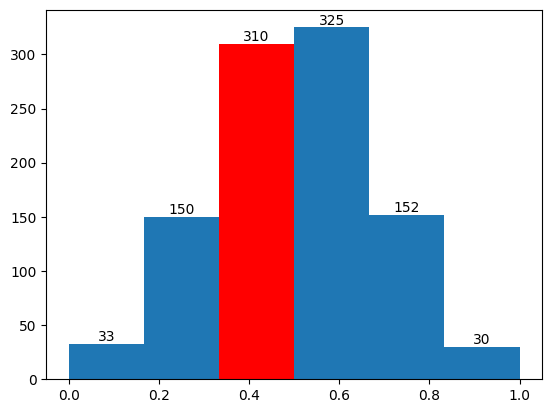

In [11]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

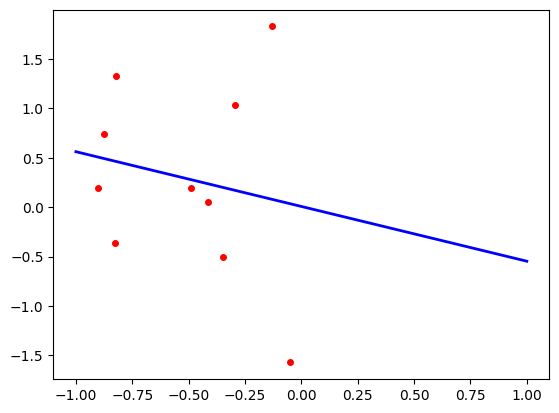

In [15]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
# y is independent of xlin
y = 0 + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
# linear the least squares solution for beta
beta = np.linalg.lstsq(X, y, rcond=None)[0]

xplot = np.linspace(-1,1,20)
# estimate y for plot line using beta
yestplot = beta[0] + beta[1]*xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

In [16]:
# check the slope of the fitted line if it close to 0 indicates no correlation
# print("Slope of the fitted line:", beta[1])

Slope of the fitted line: -0.5540214525138618


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

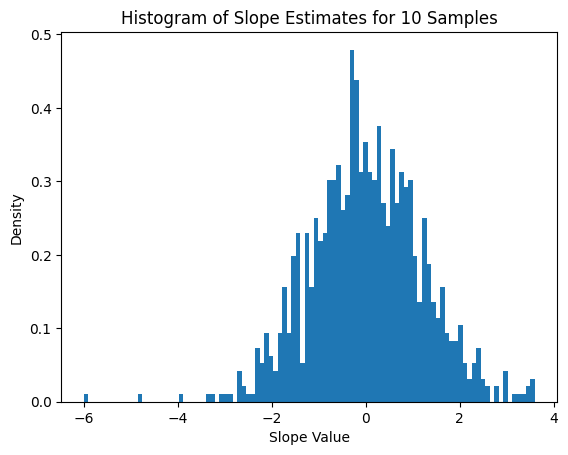

In [19]:
beta_hist = []
SAMPLE_SIZE = 10  # Initial sample size

# Generating 1000 independent datasets and fitting linear regression
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    beta_hist.append(beta[1])

# Plotting histogram of slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.title(f"Histogram of Slope Estimates for {SAMPLE_SIZE} Samples")
plt.xlabel("Slope Value")
plt.ylabel("Density")
plt.show()

Change the sample size shows that it has effect on variability of variable. Increasing the sample size generally results in more precise estimates. This is observed as a narrower distribution of slope estimates, implying that each individual estimate is closer to the true slope value while zero in this case.

What is more, the fact that the distribution is centered around zero in both cases (sample sizes 10 and 50) confirms that our data generation process correctly models a scenario where there is no relationship between X and Y.

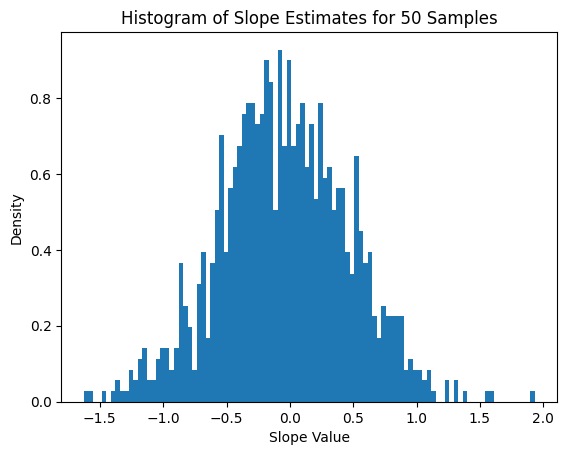

In [18]:
beta_hist = []
SAMPLE_SIZE = 50  # increase sample size

# Generating 1000 independent datasets and fitting linear regression
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    beta_hist.append(beta[1])

# Plotting histogram of slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.title(f"Histogram of Slope Estimates for {SAMPLE_SIZE} Samples")
plt.xlabel("Slope Value")
plt.ylabel("Density")
plt.show()

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

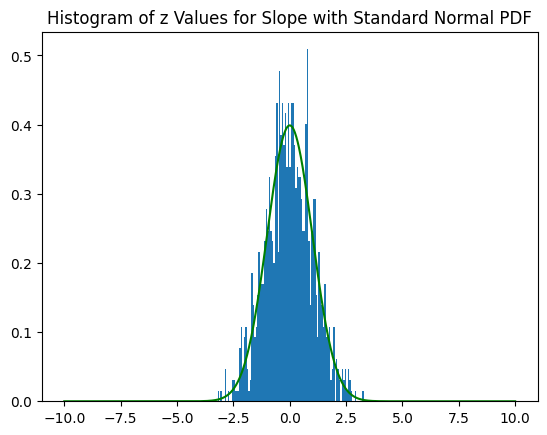

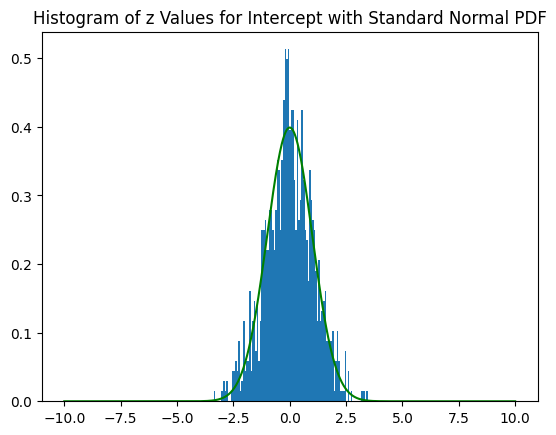

In [20]:
from scipy.stats import norm

beta_hist = []
z_slope_hist = []
z_intercept_hist = []
SAMPLE_SIZE = 50

for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    residuals = y - X.dot(beta)
    sigma2_hat = np.var(residuals, ddof=2)  # Estimate of sigma^2

    # Calculate S
    S = np.linalg.inv(X.T.dot(X))

    # Calculate z for slope and intercept
    z_slope = (beta[1] - 0) / np.sqrt(sigma2_hat * S[1, 1])
    z_intercept = (beta[0] - 0) / np.sqrt(sigma2_hat * S[0, 0])

    z_slope_hist.append(z_slope)
    z_intercept_hist.append(z_intercept)

# Plotting histogram of z values for slope
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_slope_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
plt.title("Histogram of z Values for Slope with Standard Normal PDF")
plt.show()

# Plotting histogram of z values for intercept
fig, ax = plt.subplots()
ax.hist(z_intercept_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
plt.title("Histogram of z Values for Intercept with Standard Normal PDF")
plt.show()


Note : 
The close match between the histograms and the standard normal PDF for both the slope and the intercept indicates that the distribution of our parameter estimates (after standardization) is as expected theoretically.
The fact that both histograms conform to the standard normal distribution implies that our estimations of the slope and intercept, under the conditions of the simulation (no real relationship between X and Y), behave as per the normal distribution assumptions in linear regression.

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

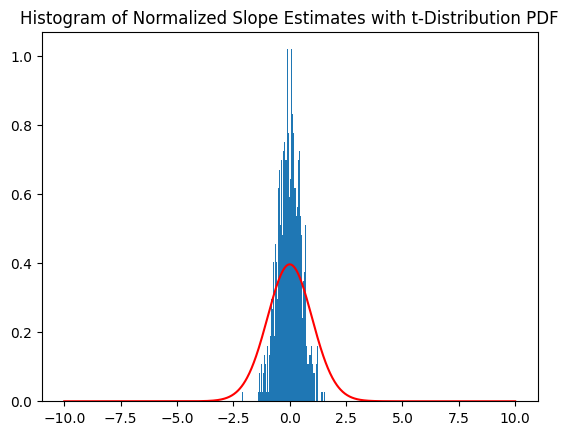

In [21]:
from scipy.stats import t

def standard_error(ytrue, ypred, p, X):
    rss = np.sum((ytrue - ypred) ** 2)
    n = len(ytrue)
    return np.sqrt(rss / (n - p))

beta_hist = []
SAMPLE_SIZE = 50
p = 2  # Number of parameters as lope and intercept

for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    ypred = X.dot(beta)
    
    s = standard_error(y, ypred, p, X)
    normalized_beta_slope = beta[1] / s
    normalized_beta_intercept = beta[0] / s

    beta_hist.append(normalized_beta_slope)
    # Alternatively, can append normalized_beta_intercept to check the intercept

# Plotting histogram of normalized beta values
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - p), color='red')
plt.title("Histogram of Normalized Slope Estimates with t-Distribution PDF")
plt.show()


The close match between the histogram and the t-distribution PDF indicates that our approach to normalizing 
^
β  is appropriate when the true standard deviation is unknown.

This alignment validates the use of the t-distribution in hypothesis tests for the regression coefficients, particularly in cases with smaller sample sizes where the normal approximation may not be as accurate.

The simulation shows that the t-distribution can be a more accurate model for the distribution of standardized regression coefficients compared to the normal distribution, especially in scenarios where the sample size is not extremely large and the standard deviation of the error term needs to be estimated from the data.

f) You are given the following dataset:

[0.50155603 1.19902827]


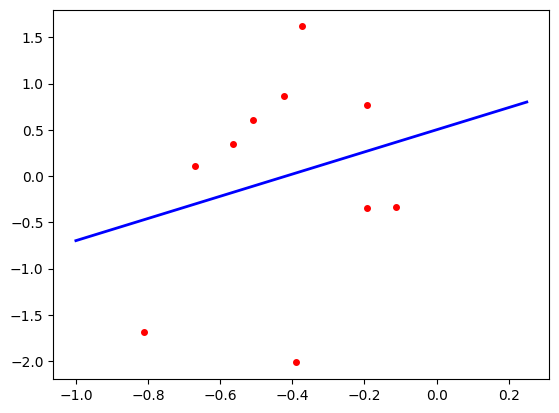

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [26]:
from scipy.stats import t

# Calculating the residuals and RSS
y_pred = X.dot(beta_hat)
residuals = y - y_pred
rss = np.sum(residuals ** 2)

# Number of data points and parameters
n = len(y)
p = 2  # Intercept and slope

# Calculating S and the standard error for the slope
S = np.linalg.inv(X.T.dot(X))
s_slope = np.sqrt(rss / (n - p) * S[1, 1])

# Calculating the t-statistic for the slope
t_statistic = beta_hat[1] / s_slope

# Calculating the p-value for a two-tailed test
p_value = 2 * min(t.sf(np.abs(t_statistic), n - p), t.cdf(-np.abs(t_statistic), n - p))

t_statistic, p_value  # Output the t-statistic and p-value





(0.6842586696389724, 0.5131420720905753)

To determine the probability of observing a dataset at least as extreme as the one given, assuming that 
β=0, we need to perform a hypothesis test. Specifically, we'll test the null hypothesis 
H0:β=0 against the alternative hypothesis Ha:β !=0. This is a two-tailed test since we're considering the possibility of 
β being either greater than or less than zero.

The calculated t-statistic for the slope of the dataset is approximately 
0.684, and the corresponding p-value is approximately 
0.513. Since p-value is greater than 0.05, we fail to reject the null hypothesis.

The high p-value suggests that the observed dataset is not particularly unusual or extreme under the assumption of a zero slope. In other words, the data does not provide strong evidence against the null hypothesis that the slope is zero.
This result indicates that there is no statistically significant linear relationship between x and y in the provided dataset, at least not one that can be detected with this sample size and at the conventional significance levels.